# Introducción

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo se descubre si un/a cliente ya no está en el gimnasio? Se puede calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que el seguidor o seguidor/a se haya aburrido y haya hecho abandono.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. La tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

# Descripción de los datos

La ruta de archivo csv proporcionado por la cadena de gimnasios es: `/datasets/gym_churn_us.csv` e incluye los siguientes campos:
- `'Churn'` — la cancelación para el mes en cuestión
- Campos de dataset actuales:
    - Datos del usuario del mes anterior
        - `'gender'`.
        - `'Near_Location'` — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
        - `'Partner'` — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
        - `'Promo_friends'` — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
        - `'Phone'` — si el/la usuario/a aportó el número de teléfono.
        - `'Age'`.
        - `'Lifetime'` — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.
    - Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
        - `'Contract_period'` — 1 mes, 3 meses, 6 meses o 1 año.
        - `'Month_to_end_contract'` — los meses que faltan hasta que expire el contrato.
        - `'Group_visits'` — si el/la usuario/a participa en sesiones grupales.
        - `'Avg_class_frequency_total'` — frecuencia media de visitas por semana a lo largo de la vida del cliente.
        - `'Avg_class_frequency_current_month'` — frecuencia media de visitas por semana durante el mes en curso.
        - `'Avg_additional_charges_total'` — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

# Pauta de trabajo

Para cumplir los objetivos se debe:

- Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
- Analizar los factores que más impactan la pérdida.
- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
- Identificar a los grupos objetivo;
- Sugerir medidas para reducir la rotación;
- Describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

Tomando en cuenta los requerimientos, el proyecto de dividirá en cinco pasos:

__Importar librerías y datos.__

- Importar correctamente todas las librerías necesarias para completar el proyecto.
- Importar correctamente el conjunto de datos proporcionado por la cadena de gimnasios.

__Llevar a cabo el análisis exploratorio de datos (EDA).__

- Revisar en dataset buscando valores ausentes y duplicados, y estudiar los valores promedio y la desviación estándar.
- Observar los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron.
- Trazar histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
- Crear una matriz de correlación y visualizarla.

__Construir un modelo para predecir la cancelación de usuarios.__

Se creará un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente, para esto se seguirán los siguientes pasos:

- Dividir los datos en conjuntos de entrenamiento y validación.
- Entrenar el modelo en el set de entrenamiento con dos métodos:
    - Regresión logística;
    - Bosque aleatorio.
- Evaluar la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Las métricas se usarán para determinar qué modelo funciona mejor.


__Crear clústeres de usuarios/as.__

Se dejará de lado la columna con datos sobre la cancelación para identificar los clústeres de objetos (usuarios/as) para esto, se realizarán las siguientes acciones:

- Estandarizar los datos.
- Crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma.
- Entrenar el modelo de clustering con el algortimo K-means y predecir los clústeres de clientes. 
- Agrupar por cluster y analizar los valores medios de las características y qué grupos son más propensos a irse.
- Trazar distribuciones de características significativas para los clústeres. 

__Sacar conclusiones y hacer recomendaciones básicas sobre el trabajo con clientes.__

Llegar a conclusiones y formular recomendaciones con respecto a la estrategia para la interacción y retención de clientes. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

## Importar librerías y datos

En esta fase se importarán todas las librerías y paquetes necesarios para llevar a cabo los requerimientos, además del conjunto de datos que será utilizado para entrenar nuestros modelos. Empezamos con las librerías.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

Se importan correctamente las librerías para analizar y visualizar datos, además de los módulos de la librería `sklearn` para dividir y estandarizar datos, métodos de regresión y clasificación con sus respectivas métricas, y lo necesario para generar agrupaciones por clusters. Seguimos con la importación del dataset.

In [2]:
churn = pd.read_csv('/datasets/gym_churn_us.csv')
churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Se importa el dataset sin errores, se visualizan las primeras 5 filas para confirmar que el dataset está correctamente separado.

## Análisis exploratorio de datos (EDA)

En esta fase se limpiarán los datos y se analizarán distribuciones y correlaciones. Empezamos con la búsqueda de valores ausentes y verificación de tipos de datos.

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

No se observan valores ausentes y los tipos de datos se ven correctos. Continuamos con la búsqueda de duplicados.

In [4]:
churn.duplicated().sum()

0

No se encuentran duplicados en el dataset. Ahora, se observarán los valores promedio y desviación estándar de las características.

In [5]:
churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


A partir de esta observación se puede observar que en la mayoría de los casos tenemos una desviación estandar baja, hay datos booleanos y numéricos con todo tipo de proporciones. Continuamos el análisis observando los promedios agrupados por cancelación.

In [6]:
churn.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Si se observan los valores medios de esta tabla, se pueden obtener algunas nociones de los factores que podrían incidir en la cancelación, por ejemplo en columnas como `Lifetime` la diferencia es muy grande e indica que __quienes cancelan, llevan, en promedio, menos tiempo de vida en el gimnasio que quienes siguen siendo clientes__. También hay columnas que parecen no tener influencia alguna, como `gender` y `Phone` que se mantienen iguales en ambas filas.

Se analizará la distribución de las características para entrenar los modelos, en caso de que se den características con una distribución anormal, se deberá estandarizar los datos.

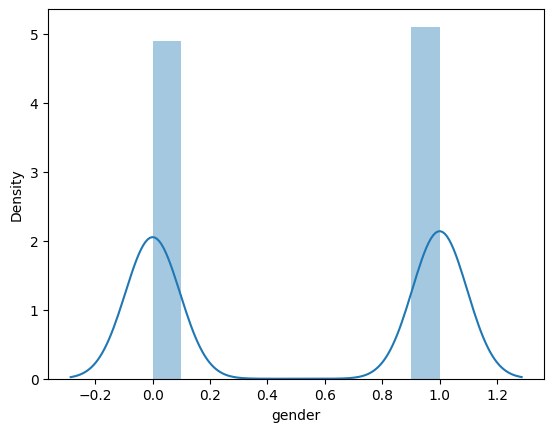

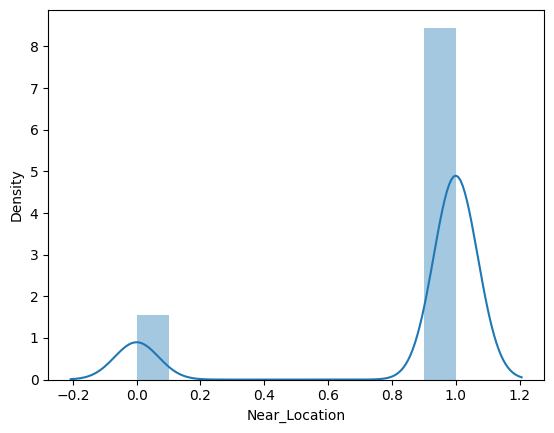

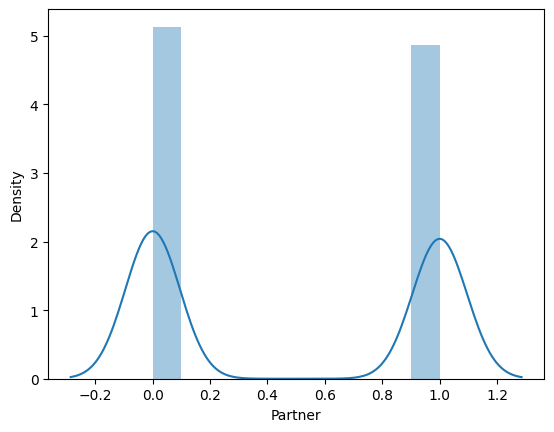

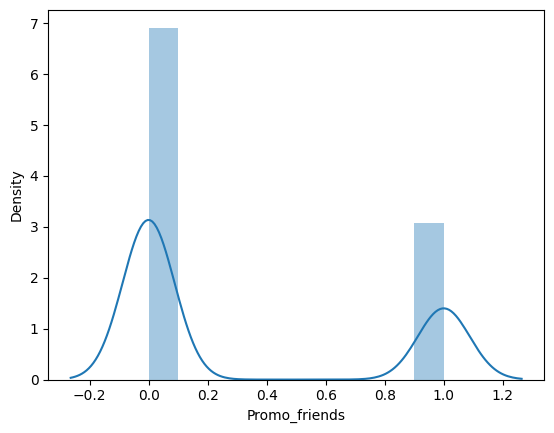

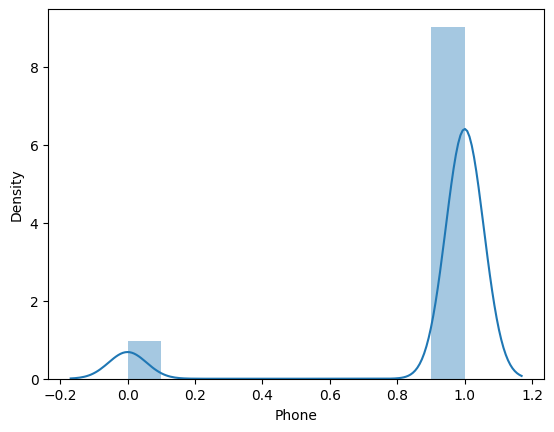

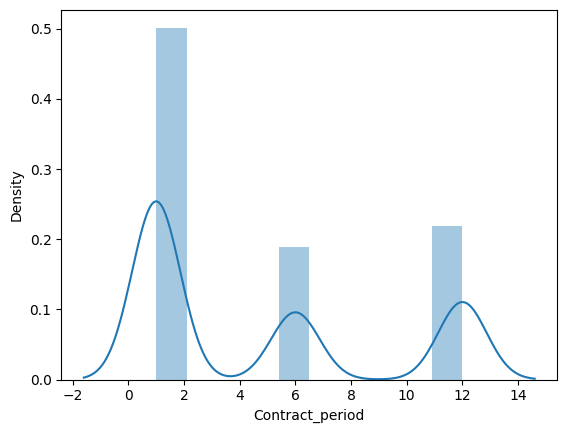

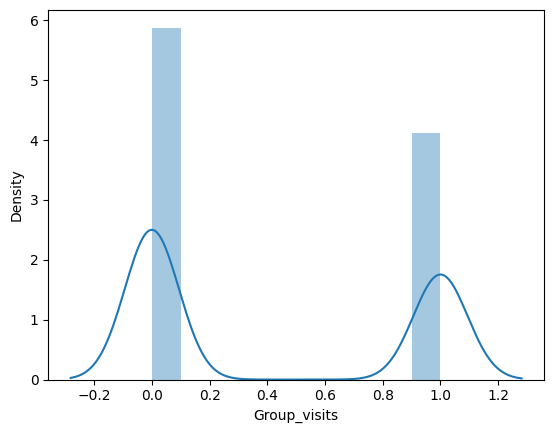

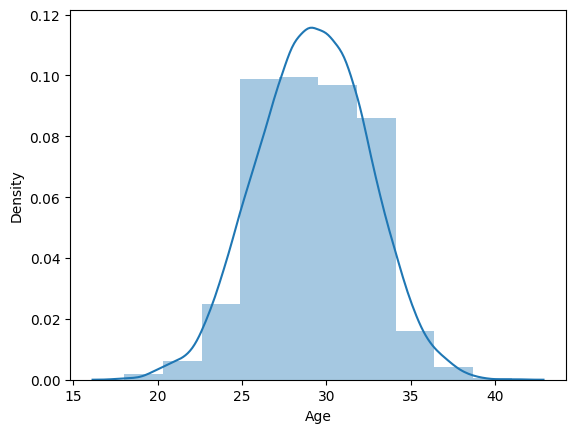

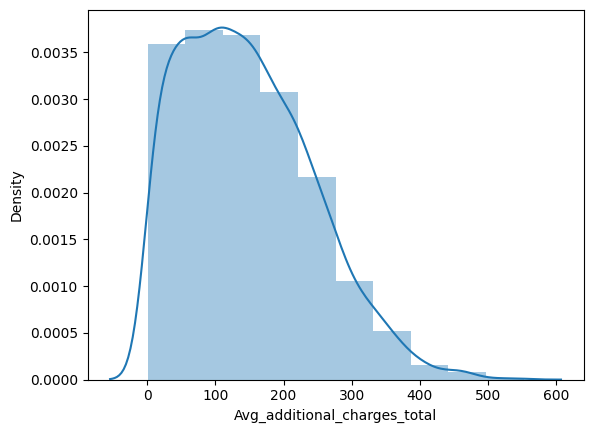

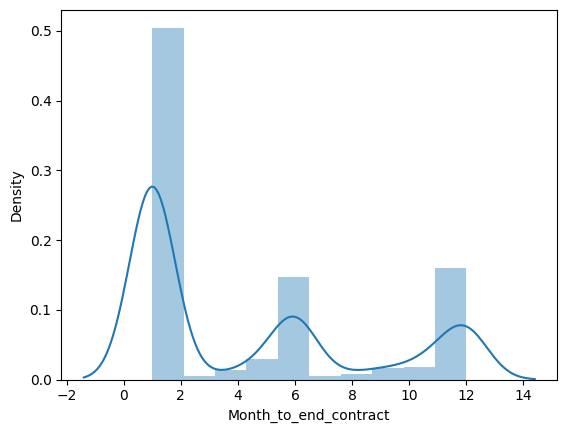

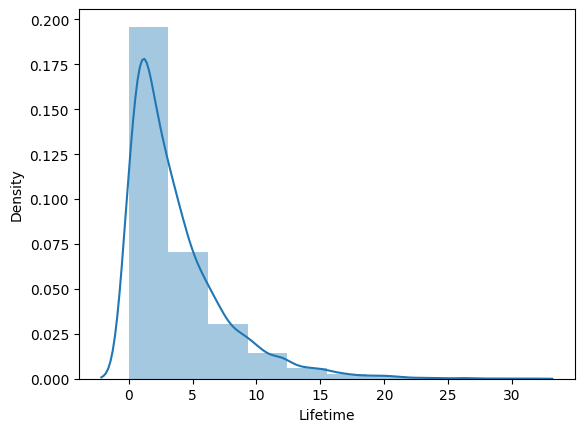

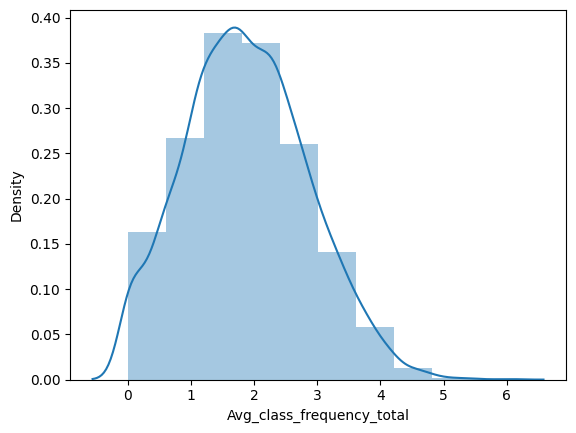

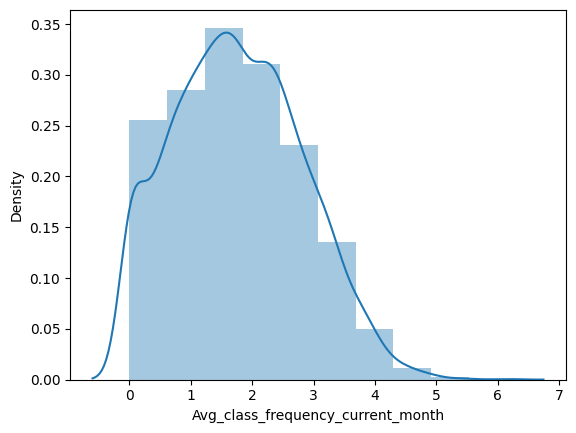

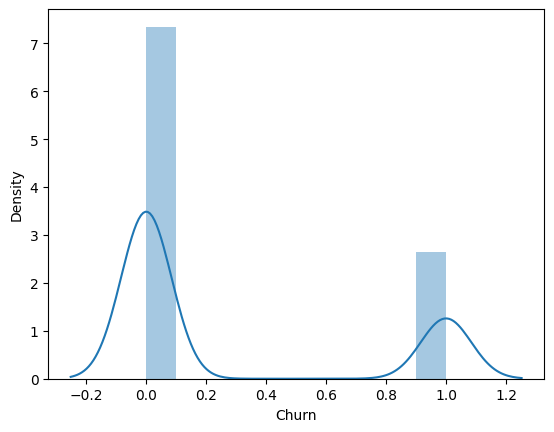

In [7]:
for feature in churn.columns:
    sns.distplot(churn[feature], bins=10)
    plt.show()

Se encuentran muchas características con distribuciones disparejas, por lo que __al momento de entrenar los modelos, se deberá estandarizar los datos__. Continuamos construyendo una matriz de correlación, esto nos puede dar luces sobre causas del `churn` (cancelación) y también sirve para tener precaución en elegir algunos modelos de regresión, debido a que correlaciones altas pueden afectar su funcionamiento.

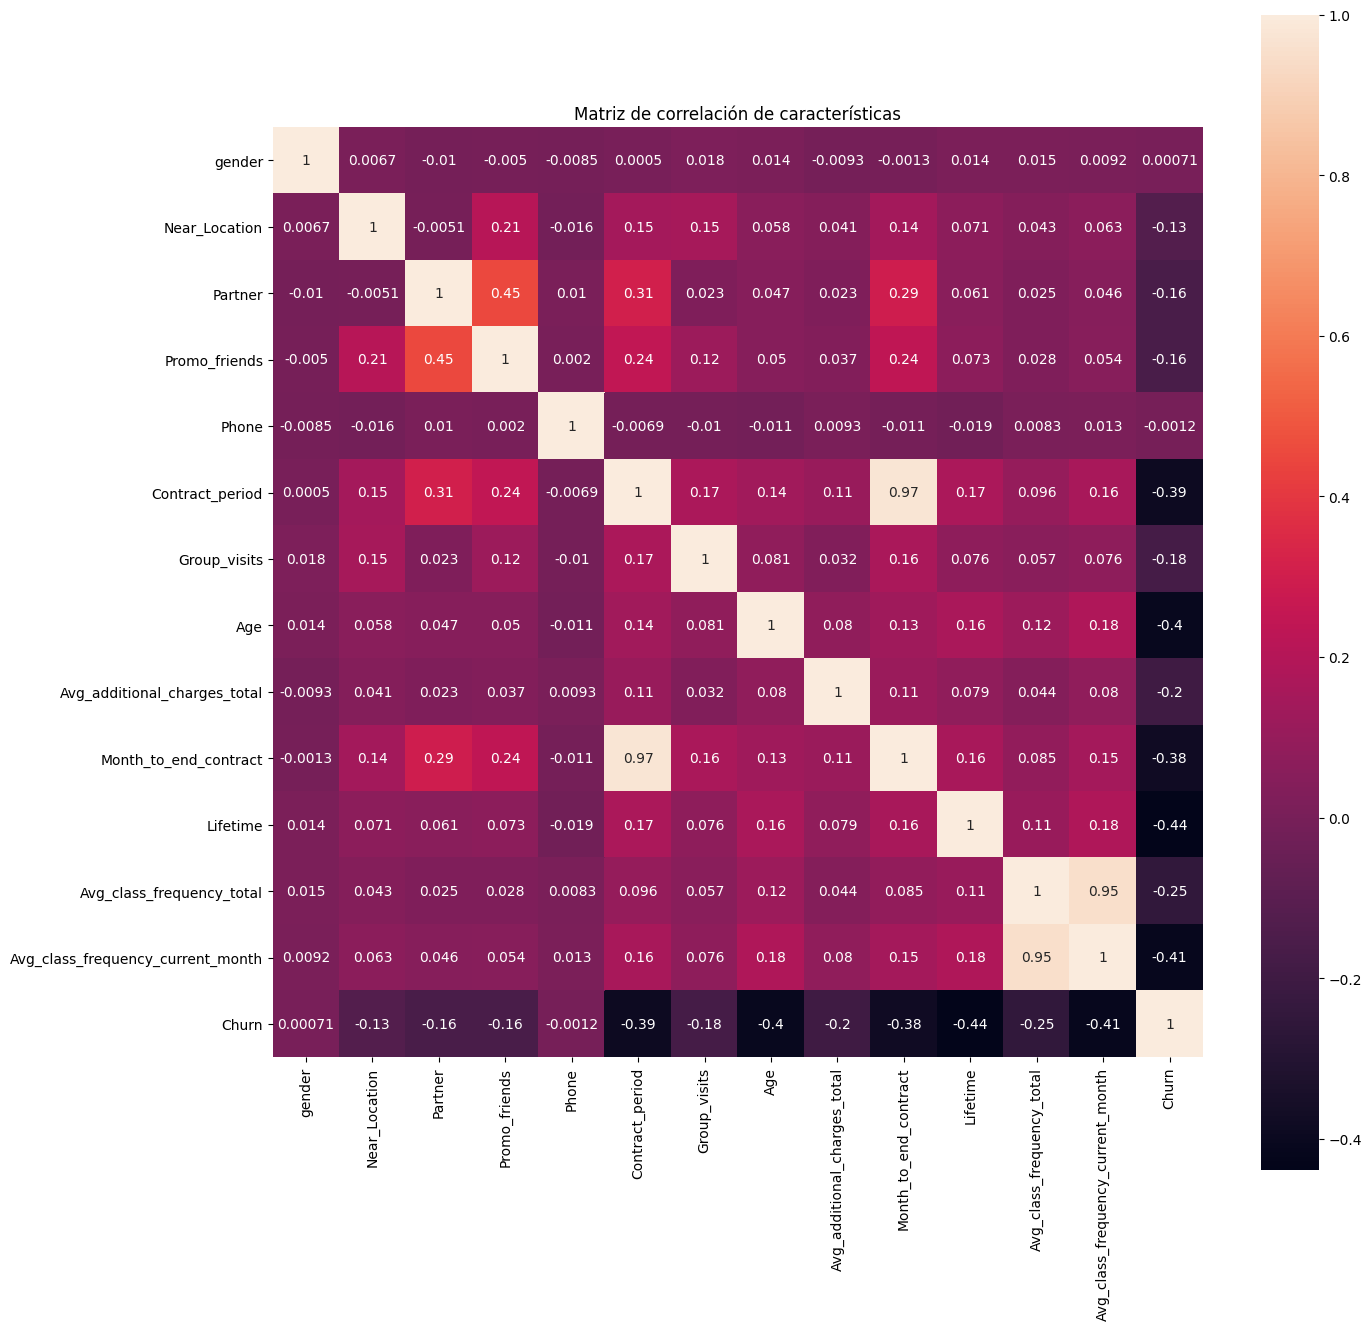

In [8]:
plt.figure(figsize=(15, 15))
sns.heatmap(churn.corr(), annot=True, square=True)
plt.title('Matriz de correlación de características');

Hay dos correlaciones muy altas que son: 
- "Cantidad de visitas semanales promedio históricamente" y "Cantidad de visitas promedio semanales en el mes presente", esta correlación es lógica y es muy esperable.
- "Meses faltantes para el término del contrato" y "Periodo de contrato", tambien puede ser lógica, ya que la gente que contrata periodos más largos, generalmente, tiene mucho más tiempo por delante que la gente que contrata periodos cortos.

Se observan también correlaciones negativas interesantes en la columna `Churn` en varias columnas, como es el caso de `Lifetime` y `Age` y `Avg_class_frecuency_current_month`, lo que indicaría que mientras más bajas estas columnas, habría más `Churn`. Con estas observaciones concluye el análisis exploratorio y pasamos a la construcción de los modelos.

## Construir un modelo para predecir la cancelación de usuarios.

Durante se estudió la constitución de las características y se vislumbraron algunas correlaciones interesantes, sin embargo, lo mejor para predecir una cancelación es un método matemático automático. Se probarán dos algoritmos matemáticos (regresión logística y bosque aleatorio) para seleccionar el mejor. Empezamos haciendo los preparativos para ello. 

In [9]:
X = churn.drop('Churn', axis=1)
y = churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()

cat_columns_train = X_train.loc[:, (X_train.nunique().isin([2, 3])) & (X_train.isin([0, 1, 2]).all())]
num_columns_train = X_train.drop(columns=cat_columns_train.columns.union(cat_columns_train.columns))
num_columns_scaled_train = pd.DataFrame(scaler.fit_transform(num_columns_train), columns=num_columns_train.columns)
X_train_st = pd.concat([num_columns_scaled_train, cat_columns_train.reset_index(drop=True)], axis=1)

cat_columns_test = X_test.loc[:, (X_test.nunique().isin([2, 3])) & (X_test.isin([0, 1, 2]).all())]
num_columns_test = X_test.drop(columns=cat_columns_test.columns.union(cat_columns_test.columns))
num_columns_scaled_test = pd.DataFrame(scaler.fit_transform(num_columns_test), columns=num_columns_test.columns)
X_test_st = pd.concat([num_columns_scaled_test, cat_columns_test.reset_index(drop=True)], axis=1)

Se han dividido los datos en `X` e `y` (Los valores de característica y la variable objetivo, respectivamente), estos datos se han vuelto a dividir en una proporción de 80/20 para entrenamiento y prueba, respectivamente. Finalmente se estandarizan los datos numéricos de entrenamiento (los booleanos como 0 y 1 o la columna `Contract_period` no cuentan como numéricos). Procedemos ahora, a crear una lista con los modelos a entrenar.

In [10]:
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

Una vez creada la lista, procedemos a crear una función que entrene los modelos, haga predicciones y nos arroje las métricas clave de cada una (exactitud, precisión y recall).

In [11]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Exactitud:{:.2f} Precisión:{:.2f} Recall:{:.2f}'.format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test,y_pred)))

Una vez creada la función, la ponemos a iterar sobre la lista de modelos

In [12]:
for i in models:
    print(i)
    make_prediction(m=i, X_train = X_train_st, y_train=y_train, X_test=X_test_st, y_test=y_test)

LogisticRegression(random_state=0)
Exactitud:0.92 Precisión:0.82 Recall:0.84
RandomForestClassifier(random_state=0)
Exactitud:0.92 Precisión:0.84 Recall:0.81


Ya tenemos los resultados de las pruebas, los dos métodos han dado buenos resultados, sin embargo, __la regresión logística con datos estandarizados ha demostrado ser la más efectiva para predecir cancelaciones__ ya que tiene más alta la métrica `Recall` y nuestro objetivo de negocio hace preferible un falso positivo (Dar beneficios a alguien que no va a renunciar) a un falso negativo (No tomar acción sobre algu).

## Crear clústeres de usuarios/as

Para segmentar adecuadamente a los clientes y prevenir el `Churn` se crearán clústeres (grupos con elementos afines) de forma automática, usando un dendrograma y el algoritmo `KMeans`. Empezamos construyendo la visualización para ello, debemos usar sólo los valores de característica y estandarizarlos antes de generar el dendrograma.

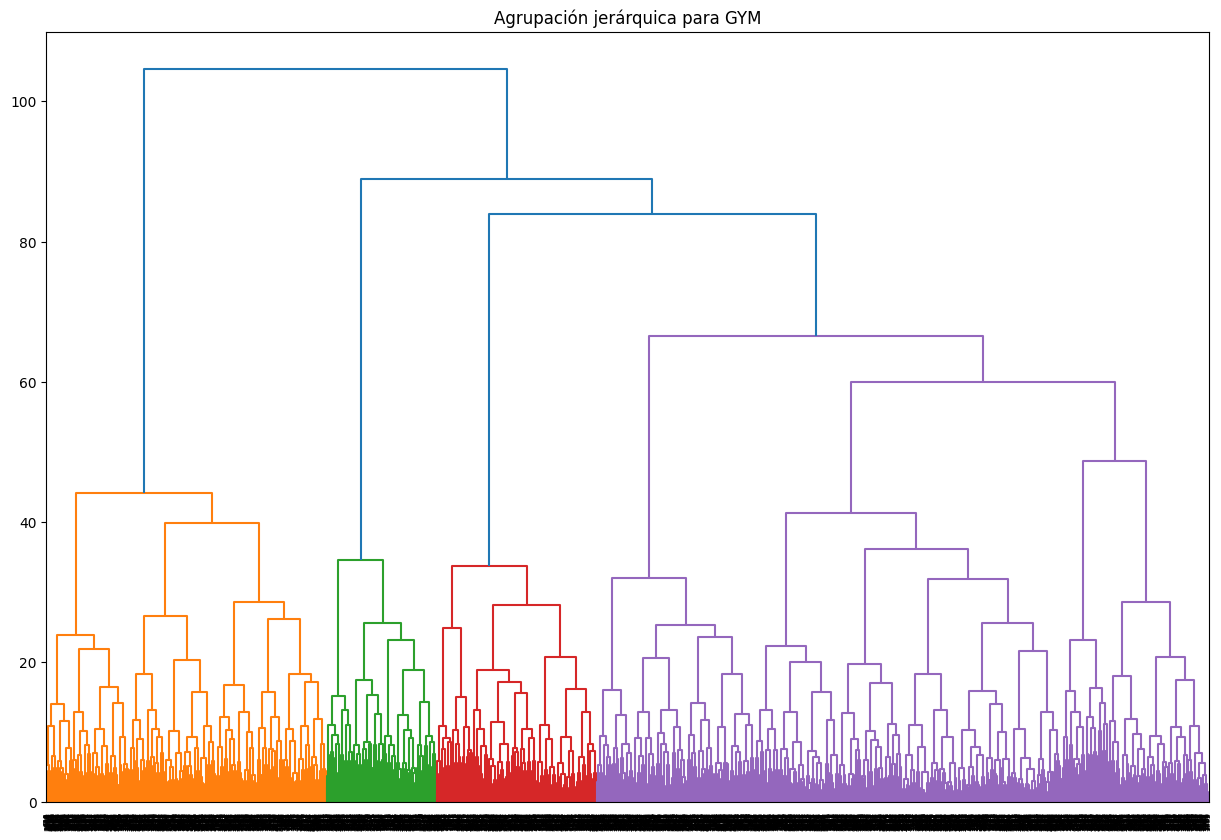

In [13]:
x_sc = scaler.fit_transform(X)
linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM');

Observando los colores y las ramificaciones del gráfico se puede estimar en 5 la cantidad apropiada de clusters para este conjunto de datos, con esta información llamamos al algoritmo `KMeans` e integramos los clusteres al dataset `churn`.

In [14]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(x_sc)
churn['cluster_clients'] = labels
churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_clients
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


Ahora en cada fila hay una etiqueta mostrando a que clúster pertenece cada cliente. Procedemos a agrupar el dataset por clusters para enfocarnos en el `Churn`.

In [15]:
churn.groupby('cluster_clients').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_clients,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Observando los clusteres en base a la cancelación, podemos separarlos en dos grupos:
- 0 y 4: tienen una tasa de cancelación bajísima, por lo que, __para disminuir la tasa de cancelación, debemos hacer que el resto de los usuarios comparta sus caracterísitcas clave__.
- 1, 2 y 3: tienen una tasa de cancelación alta: tienen características que hay que trabajar, en la conclusión de detallarán.

Ahora se mostrarán algunas distribuciones de características importantes, para lo cual se utiliza una función con el fin de automatizar el proceso.

In [16]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

Una vez lista la función, se comienza a visualizar.

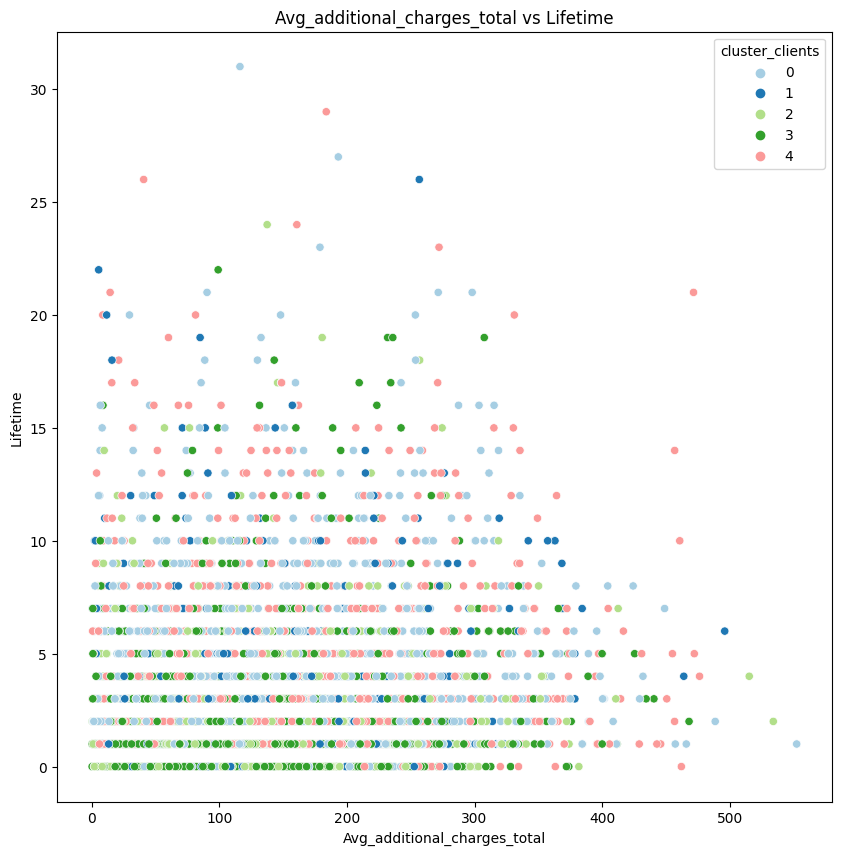

In [17]:
show_clusters_on_plot(churn, 'Avg_additional_charges_total', 'Lifetime', 'cluster_clients')

En esta visualización, a pesar se ser características que difieren entre grupos, no se puede observar una clara segmentación.

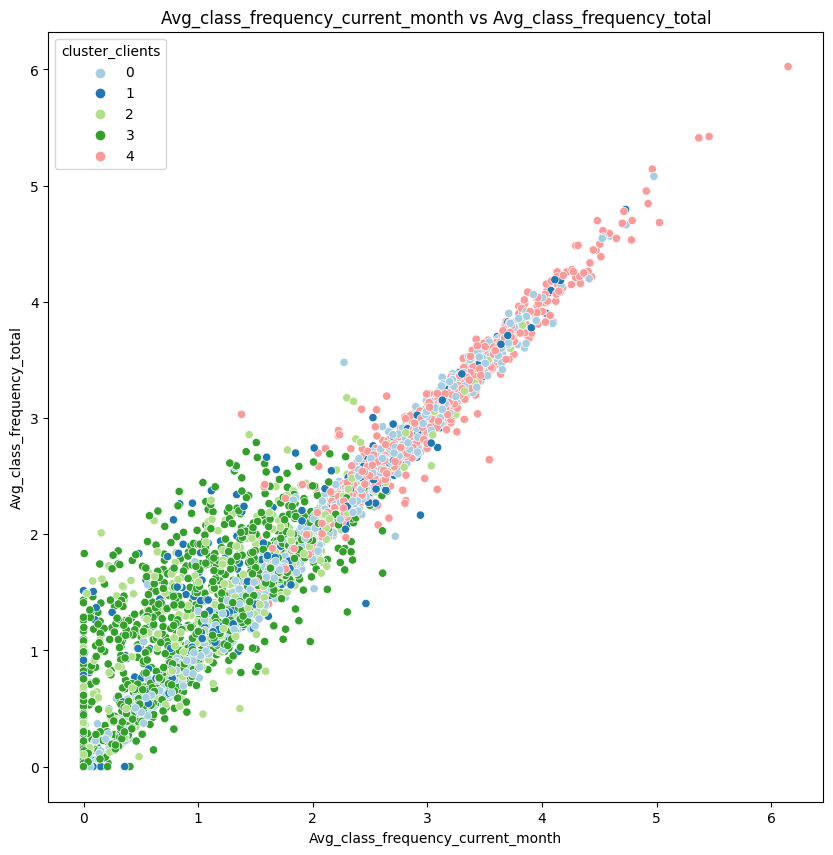

In [18]:
show_clusters_on_plot(churn, 'Avg_class_frequency_current_month', 'Avg_class_frequency_total', 'cluster_clients')

Aquí se pueden ver claramente los clusteres con más retención separados del resto, este gráfico indica que __los clientes que tienen altas probalidades de cancelar van al gimnasio menos de tres veces por semana__, esta información es muy util para desarrollar alguna estrategia de marketing para retener a los clientes.

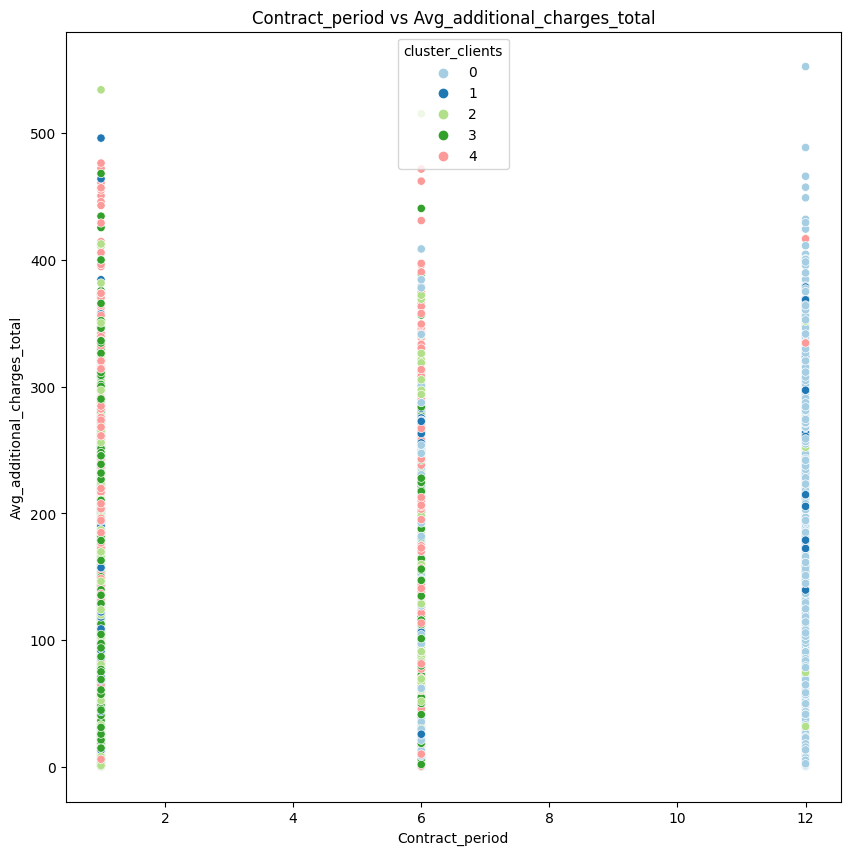

In [19]:
show_clusters_on_plot(churn, 'Contract_period', 'Avg_additional_charges_total', 'cluster_clients')

En esta distribución se puede observar claramente que __las personas que contratan 12 meses de gimnasio, son las del cluster que tiene la mejor tasa de retención__.

## Conclusión y recomendaciones

Una vez terminado este proceso y recordando el objetivo del análisis, que es disminuir la tasa de cancelación de los usuarios, es que se harán cuatro sugerecias de marketing para mejorar la métrica objetivo:

- Los clusters que más se dan de baja del gym son de usuarios que van menos de 3 veces por semana al gimnasio, y ,mientras más tiempo de vida en el recinto lleva un usuario, es menos probable que abandone. Por ende se __podría premiar la asistencia sostenida en el tiempo por 3 o más veces por semana__, dando regalos o sorteando premios entre quienes vayan haciendo "a racha de asistencia".

- __Las personas que contratan 12 meses de gimnasio, son las del cluster que tiene la mejor tasa de retención__, por ende, hacer descuentos o "dos por" traería, en teoría, fieles usuarios del gimnasio.

- Observando los clusters se puede observar que en promedio, __los grupos que más gastan comprando artículos en el gym tienen a renunciar menos__, por ende se pueden hacer descuentos estratégicos en los productos o regalar una bebida o snack proteico al momento de la contratación para familiarizar al usuario con los productos del local.

- Los clusters que más hacen actividades grupales, tienden a renunciar menos, por lo que __es conveniente incentivar a los usuarios a participar de actividades en grupo__, regalando una clase al momento de contratar o en su cumpleaños (por ejemplo).